<a href="https://colab.research.google.com/github/khalileame/i-dont-know/blob/master/Regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#we import general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# we are now going to read the data file into a dataframe using pandas

columns =['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
df = pd.read_csv('/content/auto-mpg.data',names=columns, na_values="?"
                 ,comment = '\t' 
                 ,sep=" "
                 ,skipinitialspace=True)
#making a copy of our data frame for future use
data= df.copy()

In [14]:
#visualize a sample of our data
data.sample(20)



,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
317,34.3,4,97.0,78.0,2188.0,15.8,80,2
118,24.0,4,116.0,75.0,2158.0,15.5,73,2
325,44.3,4,90.0,48.0,2085.0,21.7,80,2
321,32.2,4,108.0,75.0,2265.0,15.2,80,3
113,21.0,6,155.0,107.0,2472.0,14.0,73,1
355,33.7,4,107.0,75.0,2210.0,14.4,81,3
70,13.0,8,400.0,190.0,4422.0,12.5,72,1
57,24.0,4,113.0,95.0,2278.0,15.5,72,3
305,28.4,4,151.0,90.0,2670.0,16.0,79,1
162,15.0,6,258.0,110.0,3730.0,19.0,75,1


In [15]:
#in our problem we need to predict the MPG , which is the mile per gallon. 
#Basically it indicates the efficieny of a vehicule , Besides our vehicules are
#from the 70s and 80 s. The rest of the columns will be our features.


Now we move to EDA (Exploratory Data Analysis)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [17]:
#we now check the null values

In [18]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [19]:
#we will later treat the missing values in Horsepower


In [20]:
#summary of statistics of quantitative variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


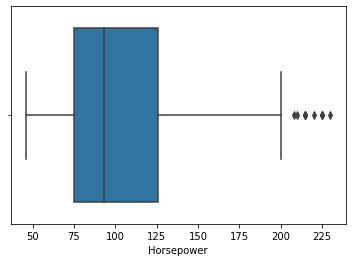

In [21]:
sns.boxplot(x=data['Horsepower'])

In [22]:
# we will fill the missing values in horspower with median , which is prefered
#over median
median = data['Horsepower'].median()
data['Horsepower'] =data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [23]:
#now We will see the category distribution of the categorical features
data["Cylinders"].value_counts()/len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [24]:
data['Origin'].value_counts()/ len (data)

1    0.625628
3    0.198492
2    0.175879
Name: Origin, dtype: float64

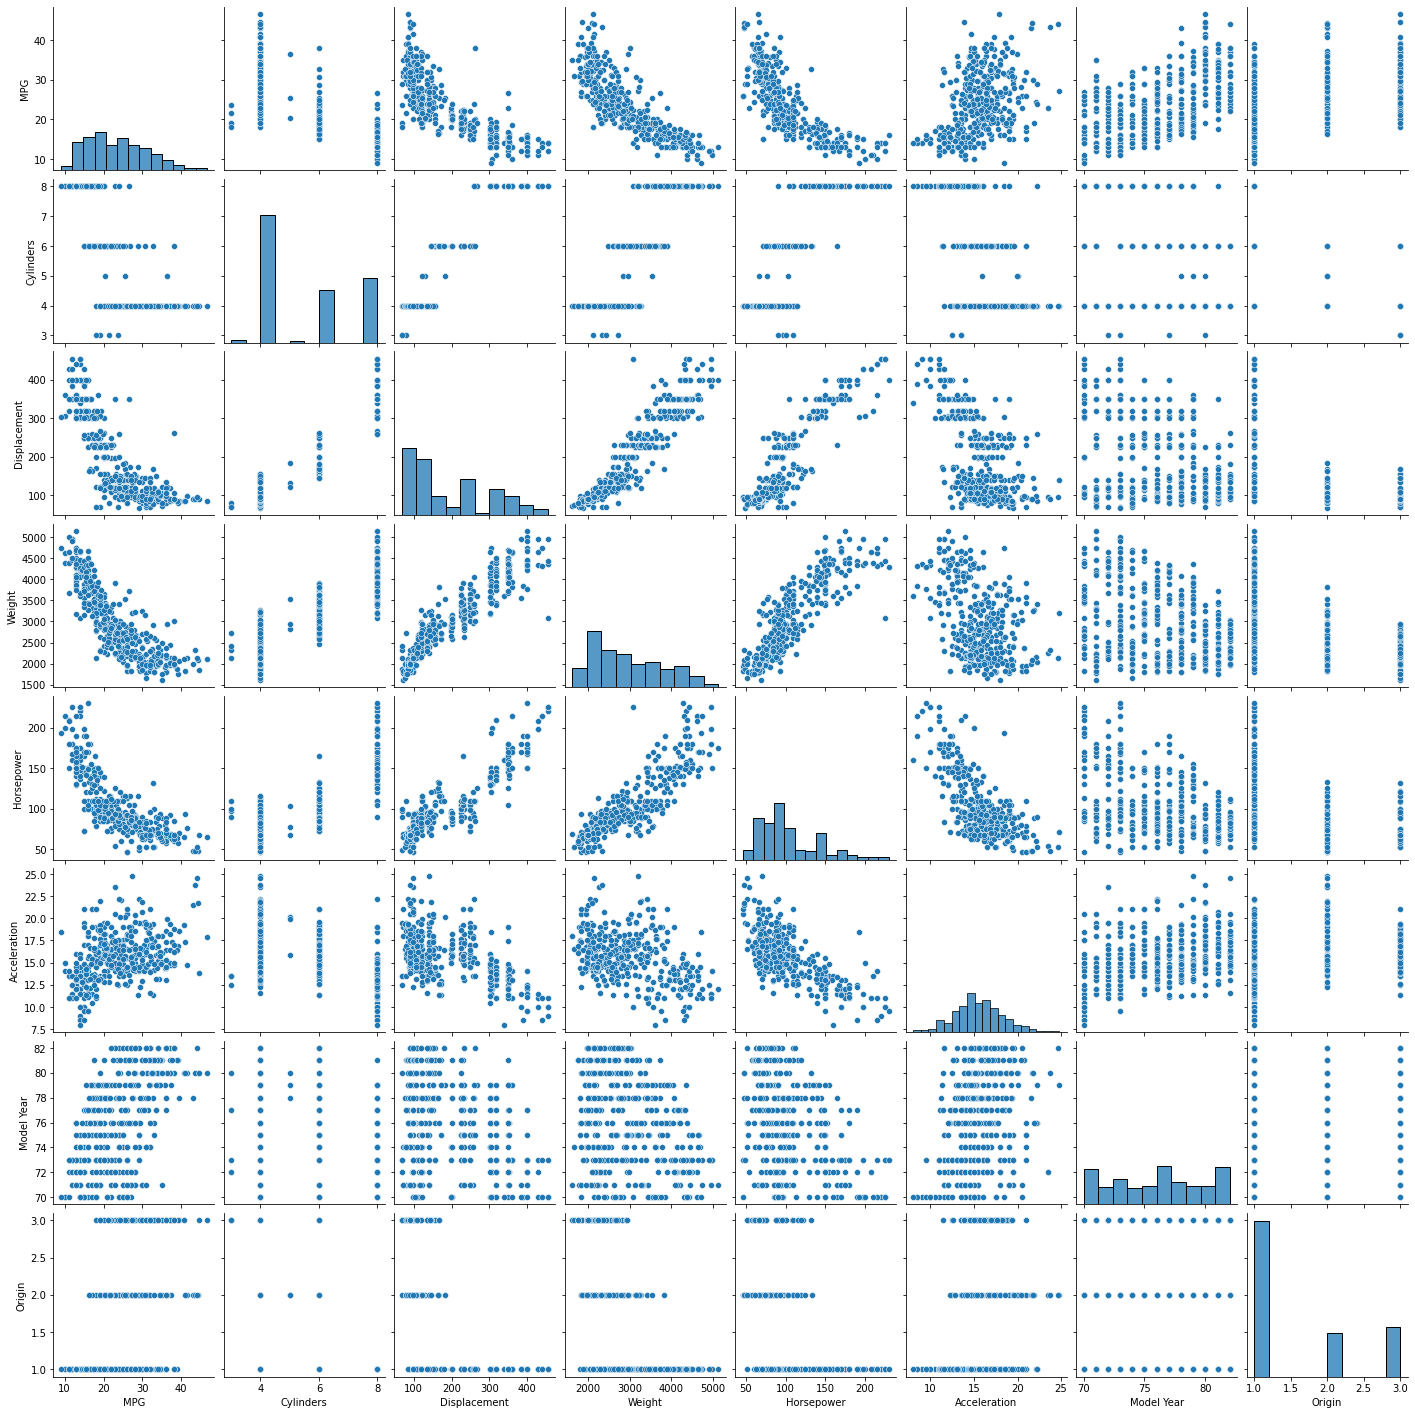

In [25]:
# now we are going to see a plot of data to get a sense of potential correlations
sns.pairplot(data[["MPG","Cylinders","Displacement","Weight","Horsepower","Acceleration","Model Year","Origin"]])

Now we move on to Data preparation

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

for train_index, test_index, in split.split(data,data["Cylinders"]):
  strat_train_set= data.loc[train_index]
  strat_test_set = data.loc[test_index]

In [27]:
#now we will segregate our Target and Feature Variables
data = strat_train_set.drop("MPG",axis=1)
data_labels = strat_train_set["MPG"].copy()
#now we have data without the mpg variable
data.sample(20)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,4,98.0,93.5,2046.0,19.0,71,1
190,8,351.0,152.0,4215.0,12.8,76,1
115,8,350.0,145.0,4082.0,13.0,73,1
79,4,96.0,69.0,2189.0,18.0,72,2
298,8,350.0,125.0,3900.0,17.4,79,1
163,6,225.0,95.0,3785.0,19.0,75,1
11,8,340.0,160.0,3609.0,8.0,70,1
263,6,231.0,165.0,3445.0,13.4,78,1
241,6,146.0,97.0,2815.0,14.5,77,3
261,6,258.0,120.0,3410.0,15.1,78,1


In [28]:
#since we have  are going to change the origin column into a categorical 
#type to use the one hot encoding
def preprocess_origin_columns(df):
  df["Origin"]=df["Origin"].map({1:"A",2:"B",3:"C"})
  return df
data_tr=preprocess_origin_columns(data)
data_tr.head()#only first 5

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,C
151,4,79.0,67.0,2000.0,16.0,74,B
388,4,156.0,92.0,2585.0,14.5,82,A
48,6,250.0,88.0,3139.0,14.5,71,A
114,4,98.0,90.0,2265.0,15.5,73,B


In [29]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
 6   Origin        318 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB


In [30]:
#now we choose only the origin column
data_cat = data_tr[["Origin"]]
data_cat.head()

,Origin
145,C
151,B
388,A
48,A
114,B


In [31]:
#onehotEncoding catego. values
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_ohot = cat_encoder.fit_transform(data_cat)
data_cat_ohot #sparse matrix


<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [32]:
data_cat_ohot.toarray()[:10]#we convert to numpy array to better visualize

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

Now we handle missing values

In [33]:
#now we segregate the numerical data
num_data= data.iloc[:,:-1]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [34]:
#the imputer class is used to fill in missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")#we chose meedian but there are alot
#of other strategies like mean...
imputer.fit(num_data)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_


array([   4. ,  146. ,   93.5, 2844. ,   15.5,   76. ])

In [36]:
#to implement the change we then use transform
X = imputer.transform(num_data)
X

array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  146. ,  120. , 2930. ,   13.8,   81. ]])

In [37]:
#we then change it to a data frame

In [38]:
data_tr = pd.DataFrame(X, columns = num_data.columns,index=num_data.index )
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    float64
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    float64
dtypes: float64(6)
memory usage: 17.4 KB


add Attributes

In [39]:
num_data.head(
)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
145,4,83.0,61.0,2003.0,19.0,74
151,4,79.0,67.0,2000.0,16.0,74
388,4,156.0,92.0,2585.0,14.5,82
48,6,250.0,88.0,3139.0,14.5,71
114,4,98.0,90.0,2265.0,15.5,73


In [40]:
from sklearn.base import BaseEstimator , TransformerMixin
acc_ix , hpower_ix , cyli_ix = 4,2,0;
class CustomAttrAdder(BaseEstimator,TransformerMixin):
  def __init__(self,acc_on_power=True):
    self.acc_on_power=acc_on_power
  def fit(self, X, y=None):
    return self #do nothing
  def transform(self,X):
    acc_on_cyli = X[:,acc_ix]/X[:,hpower_ix]
    if self.acc_on_power:
      acc_on_power = X[:,acc_ix]/X[:,hpower_ix]
      return np.c_[X,acc_on_power, acc_on_cyli]
    return np.c_[X,acc_on_cyli]
attr_adder= CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs=attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([4.0000000e+00, 8.3000000e+01, 6.1000000e+01, 2.0030000e+03,
       1.9000000e+01, 7.4000000e+01, 3.1147541e-01, 3.1147541e-01])

In [41]:
#now we create the pipline
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
#it is always best practice to scale your data

numerics=['float64','int64']

num_data= data_tr.select_dtypes(include=numerics)
                                
#in our numerical pipeline we will impute , then add the attributes then scale 
#them
num_pipeline = Pipeline([
                        ('imputer',SimpleImputer(strategy="median")),
                        ('attrs_adder',CustomAttrAdder()),
                        ('std_scaler',StandardScaler())
])
num_data_tr = num_pipeline.fit_transform(num_data)
num_data_tr[0]

array([-0.85657842, -1.07804475, -1.15261228, -1.17220298,  1.21586943,
       -0.54436373,  1.71003081,  1.71003081])

In [42]:
#now we do the complete pipeline
from sklearn.compose import ColumnTransformer

num_attrs= list(num_data)

cat_attrs=["Origin"]

full_pipeline= ColumnTransformer(
    [
     ("num",num_pipeline,num_attrs),
     ("cat",OneHotEncoder(),cat_attrs)

    ]
)

final_data = full_pipeline.fit_transform(data)

final_data

array([[-0.85657842, -1.07804475, -1.15261228, ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -1.1174582 , -0.99069325, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.3587492 , -0.31603064, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53192268, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23507113, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.32260746, -0.45728283,  0.43959149, ...,  0.        ,
         0.        ,  1.        ]])

**Now we are Going to select and train Models**

In [43]:
#we are going to look among 4 models
#linear regression
#Decision Trees
#Random Forest
#SVM Regressor

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(final_data,data_labels)

LinearRegression()

In [45]:
#now lets see and predict with our model
sample_data = data.iloc[:5]
sample_labels= data_labels.iloc[:5]

sample_data_prepared = full_pipeline.fit_transform(sample_data)

print("prediction is :", lin_reg.predict(sample_data_prepared))

prediction is : [29.13394948 27.8048449  26.01836513 12.73106823 22.20077864]


In [46]:
print("actually:",list(sample_labels))

actually: [32.0, 31.0, 26.0, 18.0, 26.0]


Now we measure the error with the MSE

In [47]:
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(final_data)
lin_mse = mean_squared_error(data_labels,mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.9602101833486114

Now for decision Trees

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(final_data, data_labels)

DecisionTreeRegressor()

In [49]:
mpg_predictions = tree_reg.predict(final_data)
tree_mse = mean_squared_error(data_labels, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The latter example shows us the main problem in decision trees which is overfitting , since no model is perfect 

So now we are going to use K fold cross validation to randolmly split the set into K subsets and train the model K times with different fold every time

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                        final_data, 
                         data_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)

In [51]:
tree_reg_rmse_scores

array([2.83433193, 2.68112616, 2.81530416, 3.36925437, 2.25131906,
       3.00904885, 3.21539267, 4.45929507, 4.07878065, 3.01201893])

In [52]:
tree_reg_rmse_scores.mean()

3.1725871853338425

In [53]:
scores = cross_val_score(lin_reg, final_data, data_labels, scoring="neg_mean_squared_error", cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores
lin_reg_rmse_scores.mean()


3.053118881340647

In [54]:
#Now for randomForest model

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(final_data, data_labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         final_data,
                                         data_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

2.563852558030194

In [55]:
#Now for SVM Regressor
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(final_data, data_labels)
svm_cv_scores = cross_val_score(svm_reg, final_data, data_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

3.077181744141429

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(final_data, data_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [58]:
cv_scores = grid_search.cv_results_

#printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

3.2324822728462457 {'max_features': 2, 'n_estimators': 3}
3.006334243672419 {'max_features': 2, 'n_estimators': 10}
2.7659206394501923 {'max_features': 2, 'n_estimators': 30}
3.2697009374605055 {'max_features': 4, 'n_estimators': 3}
2.8662967618542443 {'max_features': 4, 'n_estimators': 10}
2.830534287281907 {'max_features': 4, 'n_estimators': 30}
3.3448765018643085 {'max_features': 6, 'n_estimators': 3}
2.756271002406998 {'max_features': 6, 'n_estimators': 10}
2.6751142534555825 {'max_features': 6, 'n_estimators': 30}
3.007141105011208 {'max_features': 8, 'n_estimators': 3}
2.8146308863170098 {'max_features': 8, 'n_estimators': 10}
2.6944221310922516 {'max_features': 8, 'n_estimators': 30}
3.296642998980025 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.910740907578066 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.2965951772313207 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.903220139331386 {'bootstrap': False, 'max_features': 3, 'n_estima

In [59]:
# feature importances 

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.22229349, 0.28175828, 0.14093176, 0.16088717, 0.0155587 ,
       0.12089647, 0.02023945, 0.02718077, 0.00134776, 0.00241713,
       0.00648902])

In [60]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importances), reverse=True)

[('acc_on_power', 0.02023944756242169),
 ('acc_on_cyl', 0.027180772913028433),
 ('Weight', 0.16088717279535725),
 ('Model Year', 0.12089647255793409),
 ('Horsepower', 0.14093176261147553),
 ('Displacement', 0.28175827772833834),
 ('Cylinders', 0.22229348602036345),
 ('Acceleration', 0.015558699825192566)]

In [68]:
#Evaluating the entire system on Test Data
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()

X_test_preprocessed = preprocess_origin_columns(X_test)
X_test_prepared = full_pipeline.fit_transform(X_test_preprocessed)

final_predictions =final_model.predict(X_test_prepared) 
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.8809508702278617

In [69]:
#Now the final function to wrap everything

In [73]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origin_columns(df)
    prepared_df = full_pipeline.fit_transform(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred
    

In [74]:
#checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

array([33.37      , 19.52      , 19.13333333])

FINALLY wee save the model

In [75]:
import pickle
#saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()
#loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([33.37      , 19.52      , 19.13333333])